# Plot denitrification vs N input figure

Plot Cycles-L predicted denitrification vs N input for each model grid at the WE-38 watershed.
This Jupyter notebook requires the `PIHM-utils` Python package.

## Import and set plotting parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pihm import read_output
from my_funcs import read_cycles
from setting import MS_DIR

In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = SMALL_SIZE + 2
BIGGER_SIZE = MEDIUM_SIZE + 2

plt.rc("lines", linewidth=2.5, markersize=10, markeredgewidth=1.5)
plt.rc('font', size=MEDIUM_SIZE - 1)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE - 1)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Read Cycles-L input and output

In [3]:
_, mgmt = read_cycles('WE38')

mgmt[(mgmt == 3) | (mgmt == 4) | (mgmt == 5)] = 2
mgmt[(mgmt == 6) | (mgmt == 7)] = 3
mgmt[(mgmt == 8) | (mgmt == 9)] = 4
mgmt[(mgmt == 10)] = 5
mgmt[(mgmt == 11)] = 6

rotations = [
    'Forest',
    'Corn (2)-Soy-Corn-Hay (4)',
    'Corn (4)-Hay (4)',
    'Soy-Corn',
    'Hay',
    'Corn-Soy-Corn-Soy-\nOat Hay-Hay (3)',
]

simulation = 'WE38_1dot25xN'
_, _denitrif, _, _ = read_output('..', 'WE38', simulation, 'denitrif')
_, _n_auto, _, _ = read_output('..', 'WE38', simulation, 'n_auto')
_, _n_fix, _, _ = read_output('..', 'WE38', simulation, 'n_fix')
_, _n_fert, _, _ = read_output('..', 'WE38', simulation, 'n_fert')
_, _rootw, _, _ = read_output('..', 'WE38', simulation, 'rootw')

denitrif = np.average(_denitrif, axis=0) * 1000 * 365
n_fert = np.average(_n_fert, axis=0) * 1000 * 365
n_fix = (np.average(_n_auto, axis=0) + np.average(_n_fix, axis=0)) * 1000 * 365
n_input = n_fert + n_fix
rootw = np.average(_rootw, axis=0)

rootw_min = 0.35
rootw_max = 0.5
rootw_scaled = (rootw - rootw_min) / (rootw_max - rootw_min)
rootw_scaled = np.clip(rootw_scaled, 0, 1)

## Plot

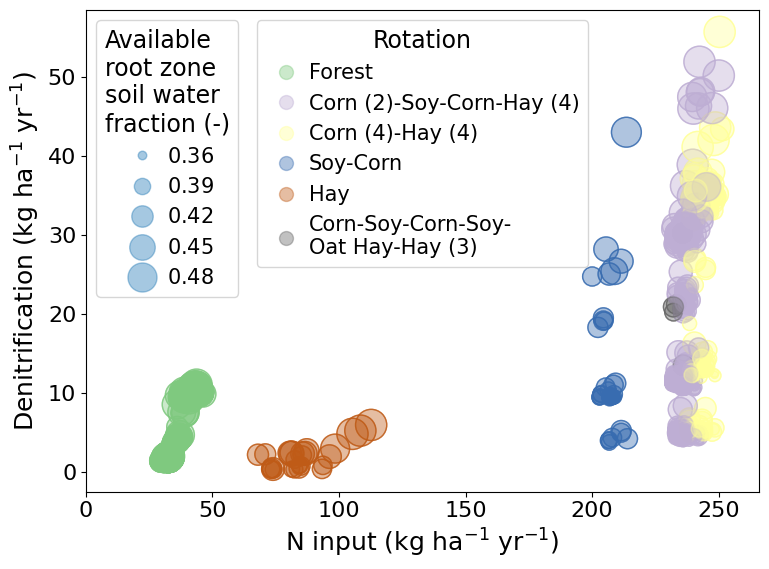

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

cmap=plt.get_cmap('Accent', 6)

ax.scatter(
    n_input, denitrif,
    s=5 + rootw_scaled * 500,
    alpha=0.8,
    facecolors='none',
    edgecolors=cmap(1.0 / 12.0 + (mgmt - 1) / 6.0),
)
scatter = ax.scatter(
    n_input, denitrif,
    c=mgmt,
    s=5 + rootw_scaled * 500,
    alpha=0.4,
    edgecolors='face',
    cmap=cmap,
)

ax.set_xlim(0, 266)
ax.set_xlabel('N input (kg ha$^{-1}$ yr$^{-1}$)') 
ax.set_ylabel('Denitrification (kg ha$^{-1}$ yr$^{-1}$)')

legend1 = ax.legend(
    handles=scatter.legend_elements()[0],
    labels=rotations,
    handletextpad=0.1,
    loc='upper center',
    title="Rotation"
)
ax.add_artist(legend1)

kw = dict(
    prop='sizes',
    num=6,
    color='tab:blue',
    func=lambda s: (s - 5) / 500 * (rootw_max - rootw_min) + rootw_min,
)
legend2 = ax.legend(
    *scatter.legend_elements(**kw),
    handletextpad=0.2,
    loc='upper left',
    title='Available\nroot zone\nsoil water\nfraction (-)',
)

plt.tight_layout()

fig.savefig(f'{MS_DIR}/latex/denitrif_vs_input.pdf', dpi=300)
fig.savefig(f'{MS_DIR}/figures/denitrif_vs_input.png', dpi=300)